In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2023-01-01'
stock = 'GOOGL'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2012-01-03 00:00:00+00:00,16.610771,16.651901,16.720470,16.325577,16.339840,146912940
2012-01-04 00:00:00+00:00,16.682417,16.723724,16.773024,16.532032,16.642391,114445440
2012-01-05 00:00:00+00:00,16.451006,16.491741,16.615866,16.422173,16.569820,131184684
2012-01-06 00:00:00+00:00,16.226587,16.266768,16.516518,16.261011,16.495245,107608284
2012-01-09 00:00:00+00:00,15.538601,15.577077,16.191191,15.546296,16.178679,232671096
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,89.009598,89.230003,89.550003,87.070000,87.110001,23003000
2022-12-27 00:00:00+00:00,87.174141,87.389999,88.940002,87.010002,88.800003,20097300


In [ ]:
#data.reset_index(inplace=True)
data.Close.max()


,0
Ticker,
GOOGL,149.838501


moving average


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

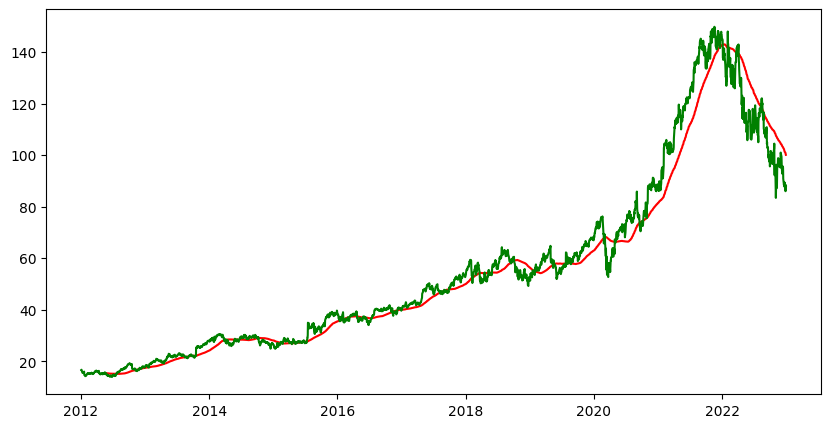

In [ ]:
plt.figure(figsize=(10,5)) # width and height
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

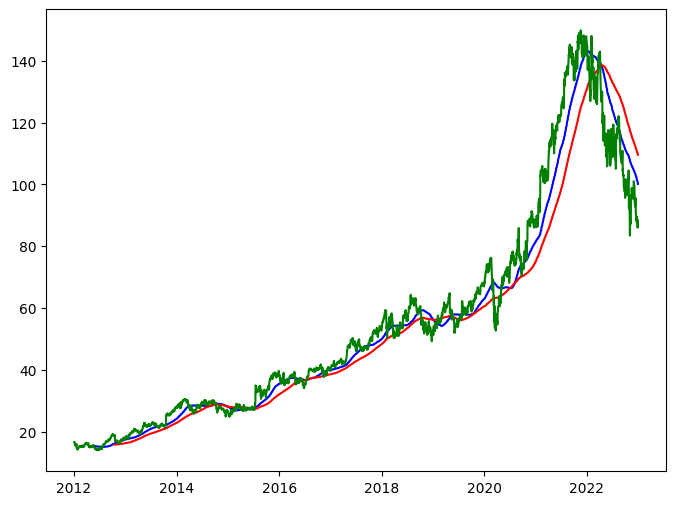

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'b')
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.isnull().sum()


,,0
Price,Ticker,
Adj Close,GOOGL,0
Close,GOOGL,0
High,GOOGL,0
Low,GOOGL,0
Open,GOOGL,0
Volume,GOOGL,0


In [ ]:
data.dropna(inplace=True)
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2012-01-03 00:00:00+00:00,16.610771,16.651901,16.720470,16.325577,16.339840,146912940
2012-01-04 00:00:00+00:00,16.682417,16.723724,16.773024,16.532032,16.642391,114445440
2012-01-05 00:00:00+00:00,16.451006,16.491741,16.615866,16.422173,16.569820,131184684
2012-01-06 00:00:00+00:00,16.226587,16.266768,16.516518,16.261011,16.495245,107608284
2012-01-09 00:00:00+00:00,15.538601,15.577077,16.191191,15.546296,16.178679,232671096
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,89.009598,89.230003,89.550003,87.070000,87.110001,23003000
2022-12-27 00:00:00+00:00,87.174141,87.389999,88.940002,87.010002,88.800003,20097300


train(80) and testing(20) the data

In [ ]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.60)]) #pd.dataframe is used to convert into 2-dimension
data_test = pd.DataFrame(data.Close[int(len(data)*0.60):int(len(data)*0.85)])
val_data = pd.DataFrame(data.Close[int(len(data)*0.85):len(data)])

In [ ]:
data_train.shape[1]

1

In [ ]:
data_test.shape[0]

692

minmaxscaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#using the train_data in MinMaxScaler
data_train_scale = scaler.fit_transform(data_train)
val_data_scale = scaler.transform(val_data)

In [ ]:
data_train_scale

array([[0.05293176],
       [0.05436009],
       [0.0497467 ],
       ...,
       [0.95292807],
       [0.95244081],
       [0.97050793]])

slicing for x and y

In [ ]:
x=[] #it add the input sequences
y=[] #it add the value that to be predicted (target value)
for i in range(100,data_train_scale.shape[0]):
   x.append(data_train_scale[i-100:i]) # ex:[0:100], it add the input sequences
   y.append(data_train_scale[i,0])#row,column index, it add the value that to be predicted


In [ ]:
x = np.array(x) # to make it 2 dimension (to use in LSTM)) # [2114,100,1]
y =np.array(y)
print(x.shape)
print(y.shape)

(1560, 100, 1)
(1560,)


In [ ]:
x_val=[] #it add the input sequences
y_val=[] #it add the value that to be predicted (target value)
for i in range(100,val_data_scale.shape[0]):
   x_val.append(val_data_scale[i-100:i]) # ex:[0:100], it add the input sequences
   y_val.append(val_data_scale[i,0])#row,column index, it add the value that to be predicted
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
print(x_val.shape)
print(y_val.shape)

(316, 100, 1)
(316,)


In [ ]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 30, activation = 'relu',return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 40,activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 70,activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.6))

model.add(LSTM(units = 90,activation = 'relu'))
model.add(Dropout(0.7))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate = 0.00009)
model.compile(optimizer = opt,loss = 'mean_squared_error',metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history  = model.fit(x,y,epochs=50, callbacks = [early_stopping] ,batch_size=10, validation_data = (x_val,y_val) , verbose=1 )

Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - loss: 0.1332 - mae: 0.2909 - val_loss: 59114067591168.0000 - val_mae: 4044679.7500
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - loss: 0.0215 - mae: 0.1082 - val_loss: 15053232275456.0000 - val_mae: 2076994.2500
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step - loss: 0.0161 - mae: 0.0910 - val_loss: 797352394752.0000 - val_mae: 520757.9688
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - loss: 0.0141 - mae: 0.0858 - val_loss: 3037356032.0000 - val_mae: 37790.4609
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 0.0154 - mae: 0.0874 - val_loss: 260009984.0000 - val_mae: 11268.0186
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - loss: 0.0118 - mae: 0.0788 - val_loss: 29005948.0000 - val_mae: 3618.2212
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - loss: 0.0121 - mae: 0.0781 - val_loss: 9970478.0000 - val_mae: 2201.5884
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step 

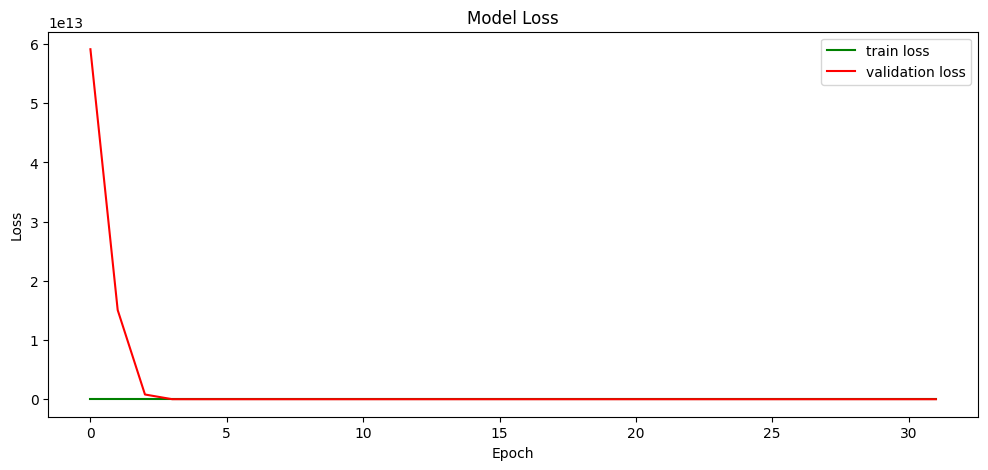

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'],'g', label='train loss')
plt.plot(history.history['val_loss'],'r', label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 30)             │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 30)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 40)             │          11,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 40)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 70)             │          31,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 70)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          48,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 90)                  │          61,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              91 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,755 (1.79 MB)

 Trainable params: 156,251 (610.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 312,504 (1.19 MB)

predicting the value from the model

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x_test=[] #it add the input sequences
y_test=[] #it add the value that to be predicted (target value)
for i in range(100,data_test_scale.shape[0]):
   x_test.append(data_test_scale[i-100:i]) # ex:[0:100], it add the input sequences
   y_test.append(data_test_scale[i,0])#row,column index, it add the value that to be predicted

x_test,y_test = np.array(x_test),np.array(y_test)

In [ ]:
y_predict = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_predict = y_predict*scale # predicted value
y_test = y_test*scale # actual value


the accuray using mean_squared_error 401.56087561980996


In [ ]:
accuracy = (y_test - y_predict) ** 2
mean_accuracy = np.mean(accuracy)
print(f"the accuray using mean_squared_error {mean_accuracy}")

the accuray using mean_squared_error 401.56087561980996


In [ ]:
rmse = mean_accuracy
rmse_mean = np.sqrt(rmse)
print(f"the accuray using root mean_squared_error {rmse_mean}")

the accuray using root mean_squared_error 20.03898389688983


In [ ]:
average_y_test = np.mean(y_test)
error_per = (rmse_mean / average_y_test) * 100
print(f"the accuray PERCENTAGE using mean_squared_error {error_per}")
print(f"Error %: {error_per:.2f}%")

the accuray PERCENTAGE using mean_squared_error 97.07097043702619
Error %: 97.07%


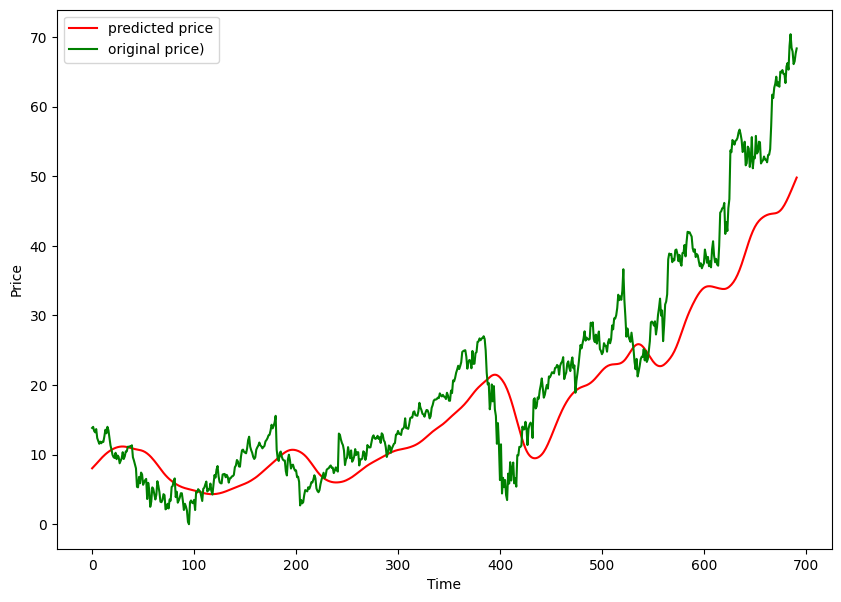

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(y_predict,'r',label='predicted price')
plt.plot(y_test,'g',label='original price)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save("stock price prediction.keras")